# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [3]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [5]:
# Importing the file porter_data_1.csv
df = pd.read_csv("D:\\Data Science\\Machine learning\\Delivery_Starter\\porter_data_1.csv")

In [7]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [9]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [11]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
df['market_id'] = df['market_id'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [13]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [15]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['isWeekend'] = df['isWeekend'].astype('int')

In [17]:
# Drop unnecessary columns
df = df.drop(columns=['created_at', 'actual_delivery_time'])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [19]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop('time_taken', axis=1)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [21]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [23]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='category').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day_of_week', 'isWeekend']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [25]:
# Plot distributions for all numerical columns
X_train[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

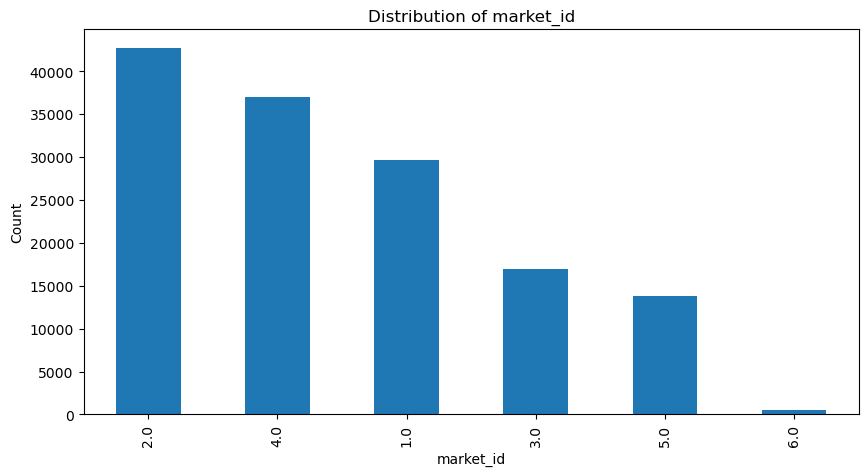

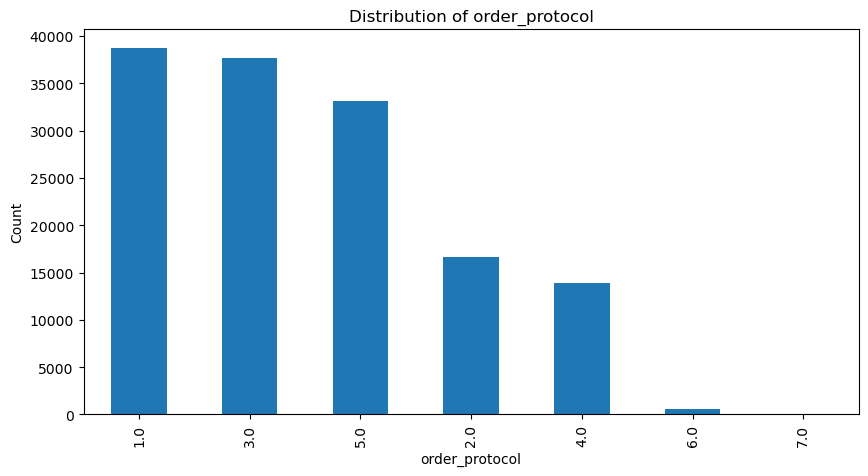

In [29]:
# Distribution of categorical columns

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    X_train[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

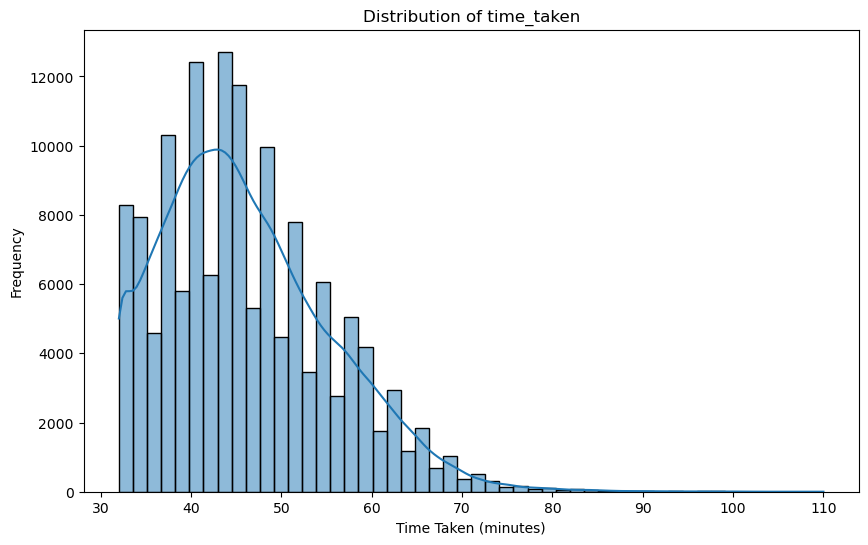

In [31]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=50, kde=True)
plt.title('Distribution of time_taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

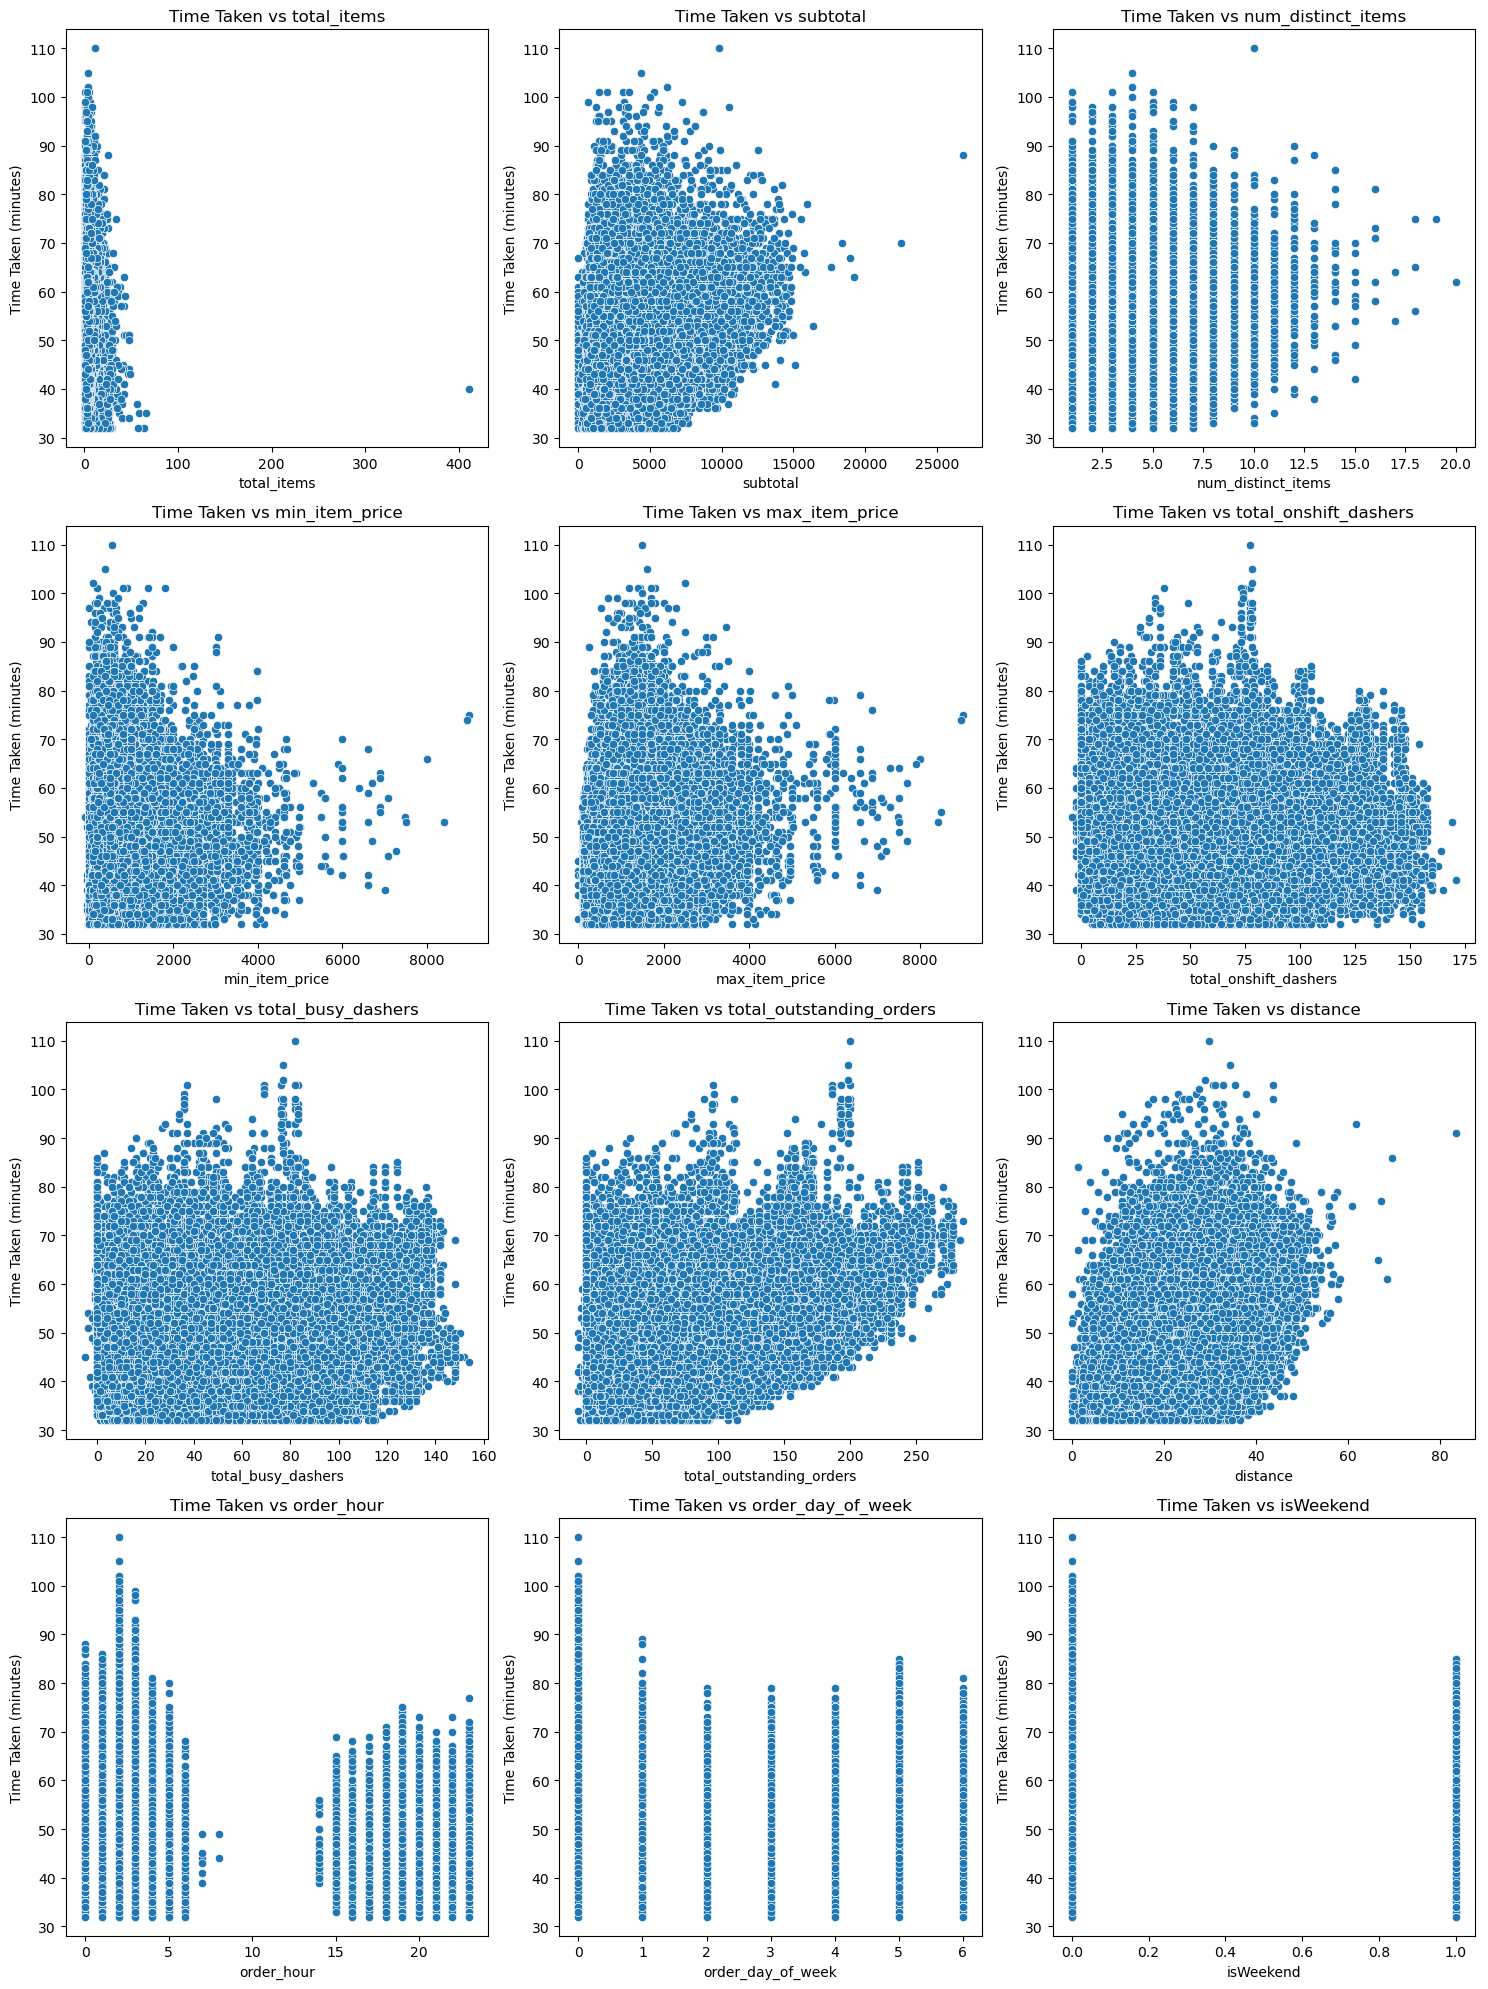

In [33]:
# Scatter plot to visualise the relationship between time_taken and other features

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=X_train[col], y=y_train, ax=axes[i])
    axes[i].set_title(f'Time Taken vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.show()


C:\Users\parth\AppData\Local\Temp\ipykernel_22320\1052337922.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = df_binned.groupby('time_bin')['delivery_time_minutes'].mean().reset_index()
C:\Users\parth\AppData\Local\Temp\ipykernel_22320\1052337922.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bin_avg, x='time_bin', y='delivery_time_minutes', palette='mako')


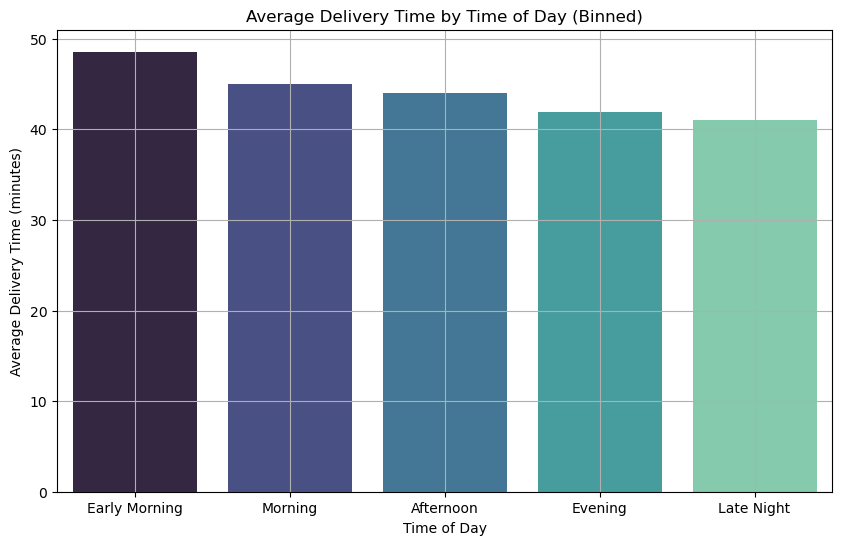

In [35]:
# Show the distribution of time_taken for different hours
df_binned = X.copy()
df_binned['delivery_time_minutes'] = y

# Define bins and labels
bins = [0, 6, 12, 18, 22, 24]
labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night']
df_binned['time_bin'] = pd.cut(df_binned['order_hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Group and plot
bin_avg = df_binned.groupby('time_bin')['delivery_time_minutes'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=bin_avg, x='time_bin', y='delivery_time_minutes', palette='mako')
plt.title("Average Delivery Time by Time of Day (Binned)")
plt.xlabel("Time of Day")
plt.ylabel("Average Delivery Time (minutes)")
plt.grid(True)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

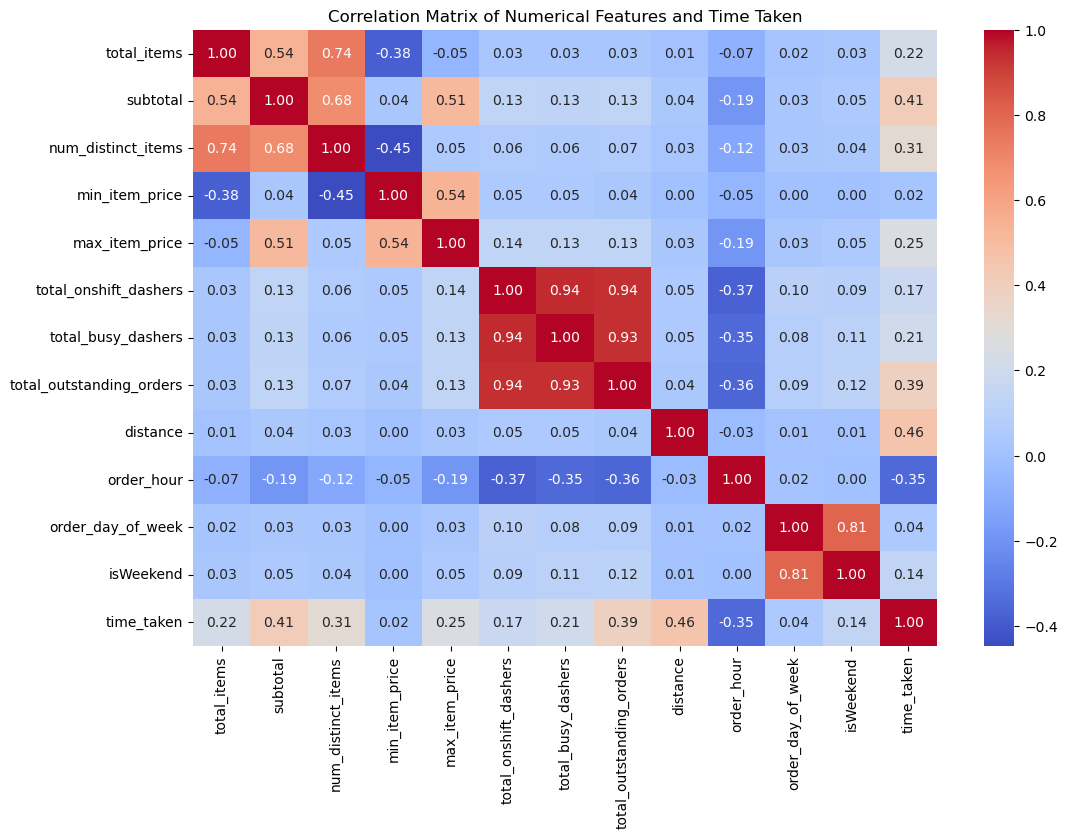

In [37]:
# Plot the heatmap of the correlation matrix
correlation_matrix = X_train[numerical_cols].copy()
correlation_matrix['time_taken'] = y_train
correlation_matrix = correlation_matrix.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Time Taken')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [39]:
# Drop 3-5 weakly correlated columns from training dataset

# Get absolute correlations with 'time_taken'
abs_correlations = correlation_matrix['time_taken'].abs().sort_values()

# Identify columns with weak correlation (e.g., less than 0.05)
weak_cor_cols = abs_correlations[abs_correlations < 0.05].index.tolist()

# Remove 'time_taken' from the list if it's there
if 'time_taken' in weak_cor_cols:
    weak_cor_cols.remove('time_taken')

print(f"Columns with weak correlation to time_taken: {weak_cor_cols}")

# Drop these columns from the training and test sets
X_train = X_train.drop(columns=weak_cor_cols)
X_test = X_test.drop(columns=weak_cor_cols)

print("\nTraining set columns after dropping weakly correlated features:")
print(X_train.columns)
print("\nTesting set columns after dropping weakly correlated features:")
print(X_test.columns)

Columns with weak correlation to time_taken: ['min_item_price', 'order_day_of_week']

Training set columns after dropping weakly correlated features:
Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')

Testing set columns after dropping weakly correlated features:
Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [43]:
# Boxplot for time_taken
# Update numerical_cols to reflect the columns remaining in X_train
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Boxplot for time_taken
plt.figure(figsize=(10, 6))
sns.boxplot(y=y_train)
plt.title('Boxplot of Time Taken')
plt.ylabel('Time Taken (minutes)')
plt.show()

# Boxplots for numerical features in a grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=X_train[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [45]:
# Handle outliers

# Cap outliers in numerical columns using the 95th percentile
for col in numerical_cols:
    upper_limit = X_train[col].quantile(0.95)
    X_train[col] = np.where(X_train[col] > upper_limit, upper_limit, X_train[col])

# Cap outliers in the target variable using the 95th percentile
upper_limit_y = y_train.quantile(0.95)
y_train = np.where(y_train > upper_limit_y, upper_limit_y, y_train)

print("Outliers in numerical columns and target variable have been capped at the 95th percentile in the training set.")


Outliers in numerical columns and target variable have been capped at the 95th percentile in the training set.


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [49]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols_test = X_test.select_dtypes(include=np.number).columns.tolist()
categorical_cols_test = X_test.select_dtypes(include='category').columns.tolist()

print("Numerical columns (Test Set):", numerical_cols_test)
print("Categorical columns (Test Set):", categorical_cols_test)


Numerical columns (Test Set): ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']
Categorical columns (Test Set): ['market_id', 'store_primary_category', 'order_protocol']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [51]:
# Plot distributions for all numerical columns
X_test[numerical_cols_test].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

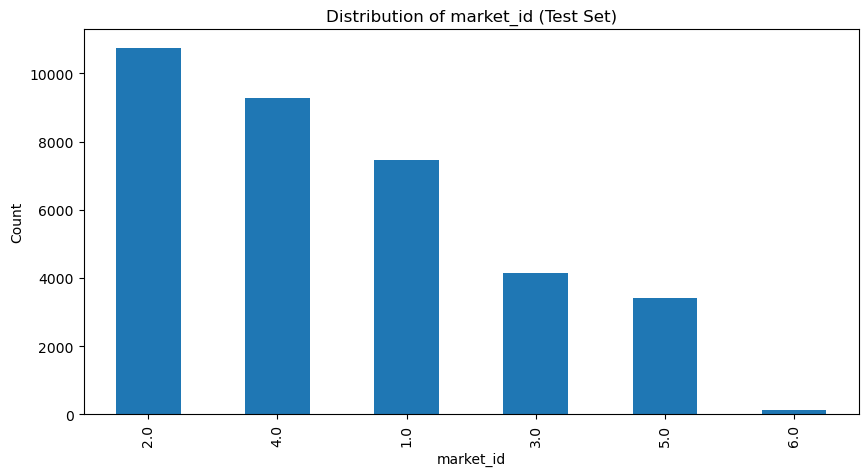

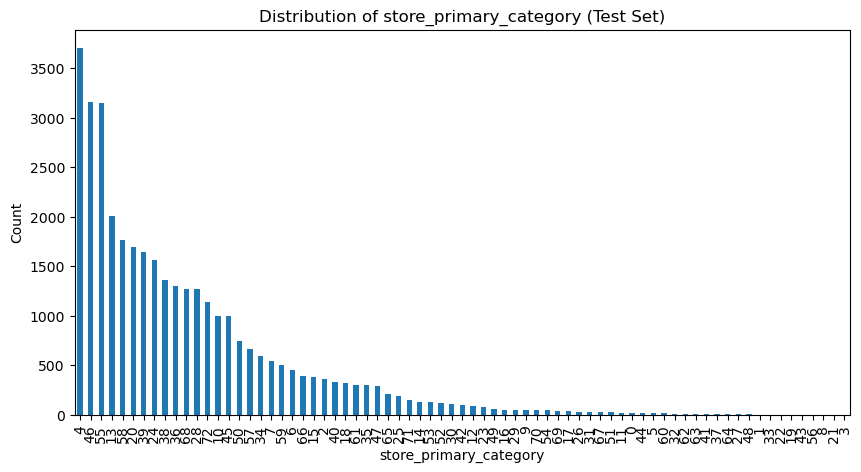

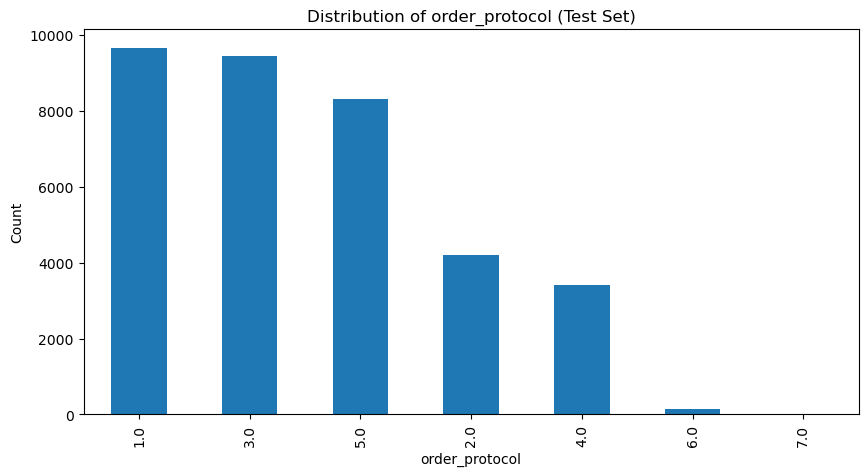

In [55]:
# Distribution of categorical columns
for col in categorical_cols_test:
    plt.figure(figsize=(10, 5))
    X_test[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col} (Test Set)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

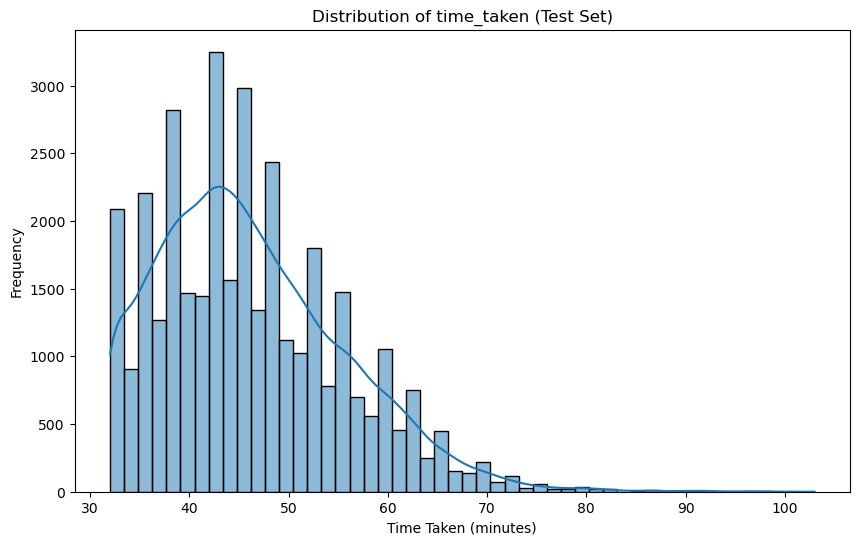

In [57]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=50, kde=True)
plt.title('Distribution of time_taken (Test Set)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

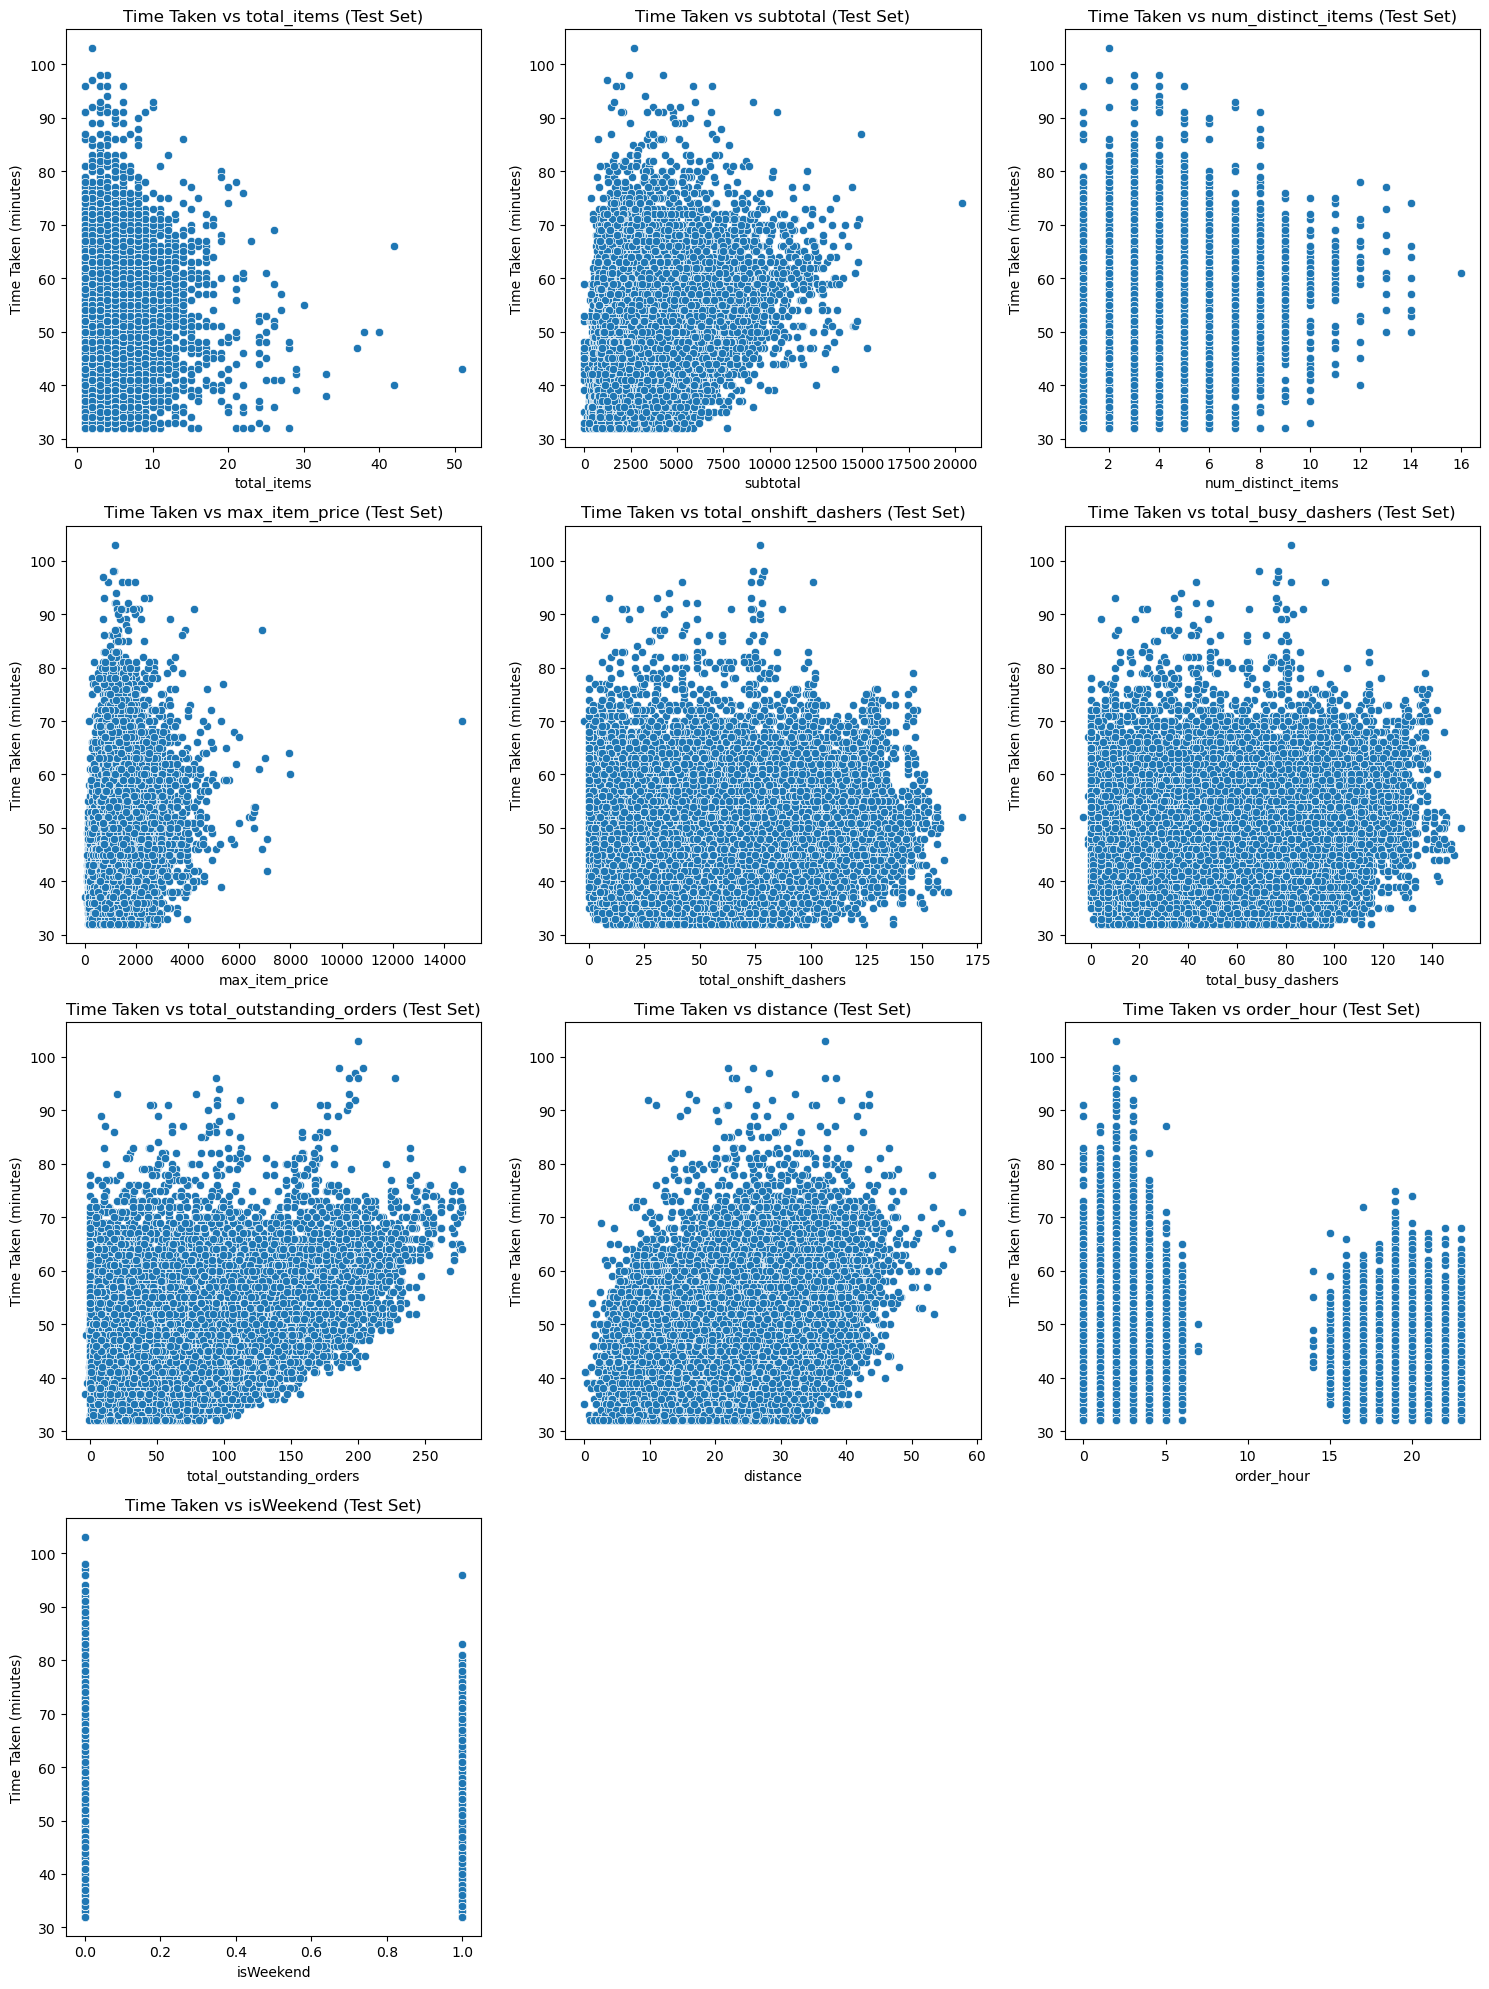

In [59]:
# Scatter plot to visualise the relationship between time_taken and other features

# Scatter plots to visualise the relationship between time_taken and numerical features

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_test):
    sns.scatterplot(x=X_test[col], y=y_test, ax=axes[i])
    axes[i].set_title(f'Time Taken vs {col} (Test Set)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Time Taken (minutes)')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [61]:
# Import libraries
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [63]:
# Apply scaling to the numerical columns
# Identify numerical columns again as the list might have changed after dropping columns
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical columns in training and testing sets have been scaled.")


Numerical columns in training and testing sets have been scaled.


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [65]:
# Create/Initialise the model
model = LinearRegression()

In [67]:
# Train the model using the training data
# One-hot encode categorical features and then train the model
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

pipeline.fit(X_train, y_train)

print("Linear regression model trained successfully.")

Linear regression model trained successfully.


In [69]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [71]:
# Find results for evaluation metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 8.75
Root Mean Squared Error (RMSE): 2.96
R-squared (R2): 0.90


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [77]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

results = []
# Use X_train_processed which includes scaled numerical and one-hot encoded categorical features
num_features_to_test = range(1, X_train.shape[1] + 1)

# One-hot encode categorical features before RFE
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


for n_features in num_features_to_test:
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n_features)
    
    # Fit RFE on the processed training data and original y_train
    rfe.fit(X_train_processed, y_train)

    # Get the selected features indices
    selected_features_indices = rfe.support_

    # Get the names of the selected features after preprocessing
    # This requires access to the preprocessor used before
    # Assuming 'preprocessor' from cell 'hbJVZpMiW8b2' is available
    try:
        selected_feature_names = preprocessor.get_feature_names_out()[selected_features_indices]
    except NameError:
        # If preprocessor is not available, just use indices or handle as needed
        selected_feature_names = selected_features_indices


    # Train a new model with selected features
    model_selected = LinearRegression()
    # Select columns from the processed data using the selected indices
    model_selected.fit(X_train_processed[:, selected_features_indices], y_train)

    # Make predictions and evaluate on the test set using the selected features
    y_pred_selected = model_selected.predict(X_test_processed[:, selected_features_indices])
    mse_selected = mean_squared_error(y_test, y_pred_selected)
    rmse_selected = np.sqrt(mse_selected)
    r2_selected = r2_score(y_test, y_pred_selected)

    results.append({'num_features': n_features,
                    'selected_features': selected_feature_names.tolist() if isinstance(selected_feature_names, np.ndarray) else selected_feature_names,
                    'MSE': mse_selected,
                    'RMSE': rmse_selected,
                    'R2': r2_selected})

# Display results
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='RMSE'))

num_features                                  selected_features  \
10            11  [num__subtotal, num__total_onshift_dashers, nu...   
12            13  [num__subtotal, num__total_onshift_dashers, nu...   
11            12  [num__subtotal, num__total_onshift_dashers, nu...   
9             10  [num__subtotal, num__total_onshift_dashers, nu...   
8              9  [num__subtotal, num__total_onshift_dashers, nu...   
7              8  [num__subtotal, num__total_onshift_dashers, nu...   
6              7  [num__subtotal, num__total_onshift_dashers, nu...   
4              5  [num__total_onshift_dashers, num__total_busy_d...   
5              6  [num__total_onshift_dashers, num__total_busy_d...   
3              4  [num__total_onshift_dashers, num__total_busy_d...   
2              3  [num__total_onshift_dashers, num__total_outsta...   
1              2  [num__total_onshift_dashers, num__total_outsta...   
0              1                    [num__total_outstanding_orders]   

          MSE      RMSE        R2  
10   9.753907  3.123125  0.888562  
12   9.753930  3.123128  0.888561  
11   9.753934  3.123129  0.888561  
9    9.755536  3.123385  0.888543  
8    9.763538  3.124666  0.888451  
7   13.111913  3.621038  0.850196  
6   13.912618  3.729962  0.841048  
4   24.759426  4.975884  0.717123  
5   24.759435  4.975885  0.717123  
3   43.699868  6.610588  0.500729  
2   45.608423  6.753401  0.478923  
1   48.872928  6.990918  0.441626  
0   74.658489  8.640514  0.147026

In [107]:

# Build the final model with selected number of features

selected_feature_names_final = [
    'num__subtotal',
    'num__total_onshift_dashers',
    'num__total_busy_dashers',
    'num__total_outstanding_orders',
    'num__distance',
    'num__order_hour',
    'num__isWeekend',
    'num__total_items' # Include 'total_items' as requested
]


print(f"Building final model with {len(selected_feature_names_final)} features:")
print(selected_feature_names_final)

# Get the indices of the selected features from the processed training data
# This assumes the order of features in get_feature_names_out() is consistent
all_feature_names_processed = preprocessor.get_feature_names_out()
selected_features_indices_final = [np.where(all_feature_names_processed == name)[0][0] for name in selected_feature_names_final]


# Train the final model with the selected features
final_model = LinearRegression()
final_model.fit(X_train_processed[:, selected_features_indices_final], y_train) # Using original y_train as per current state

# Evaluate the final model on the test set
y_pred_final = final_model.predict(X_test_processed[:, selected_features_indices_final])
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

print("\nFinal Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_final:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.2f}")
print(f"R-squared (R2): {r2_final:.2f}")

Building final model with 8 features:
['num__subtotal', 'num__total_onshift_dashers', 'num__total_busy_dashers', 'num__total_outstanding_orders', 'num__distance', 'num__order_hour', 'num__isWeekend', 'num__total_items']

Final Model Evaluation:
Mean Squared Error (MSE): 12.60
Root Mean Squared Error (RMSE): 3.55
R-squared (R2): 0.86


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [109]:
# Apply log transform to the target variable 
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

print("Target variable has been log-transformed.")

Target variable has been log-transformed.


In [111]:
# Rebuild the final model with the log-transformed target

# Train the final model with the selected features and log-transformed target
final_model_transformed = LinearRegression()
final_model_transformed.fit(X_train_processed[:, selected_features_indices_final], y_train_transformed)

print("Final model rebuilt with log-transformed target.")

Final model rebuilt with log-transformed target.


In [113]:
# Make predictions with the transformed target model
y_pred_transformed = final_model_transformed.predict(X_test_processed[:, selected_features_indices_final])

# Transform predictions back to the original scale for evaluation
y_pred_original_scale = np.expm1(y_pred_transformed)

# Evaluate the model on the original scale for comparison
mse_transformed = mean_squared_error(y_test, y_pred_original_scale)
rmse_transformed = np.sqrt(mse_transformed)
r2_transformed = r2_score(y_test, y_pred_original_scale)

print("\nFinal Model Evaluation (with log-transformed target, evaluated on original scale):")
print(f"Mean Squared Error (MSE): {mse_transformed:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_transformed:.2f}")
print(f"R-squared (R2): {r2_transformed:.2f}")


Final Model Evaluation (with log-transformed target, evaluated on original scale):
Mean Squared Error (MSE): 14.14
Root Mean Squared Error (RMSE): 3.76
R-squared (R2): 0.84


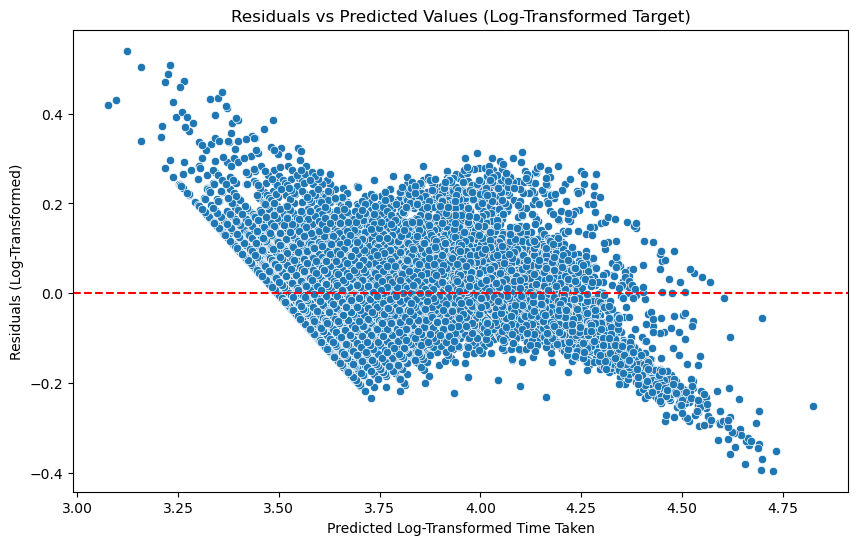

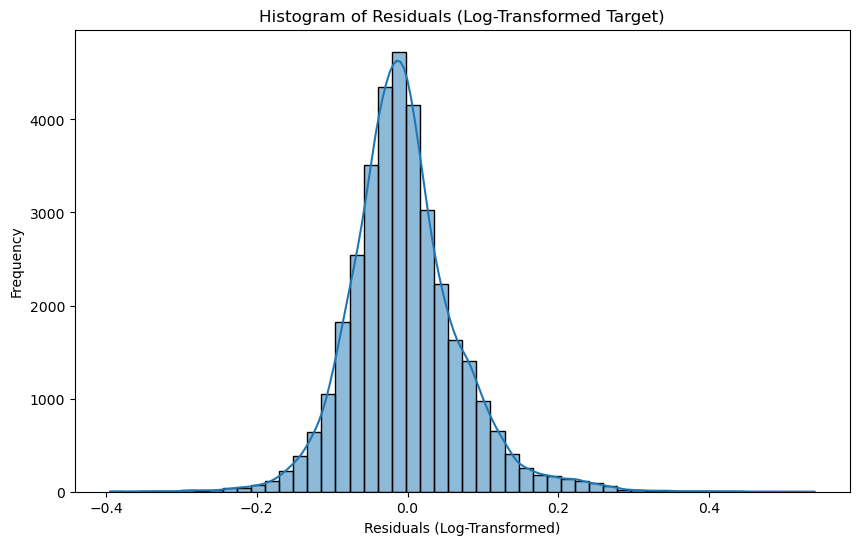

<Figure size 1000x600 with 0 Axes>

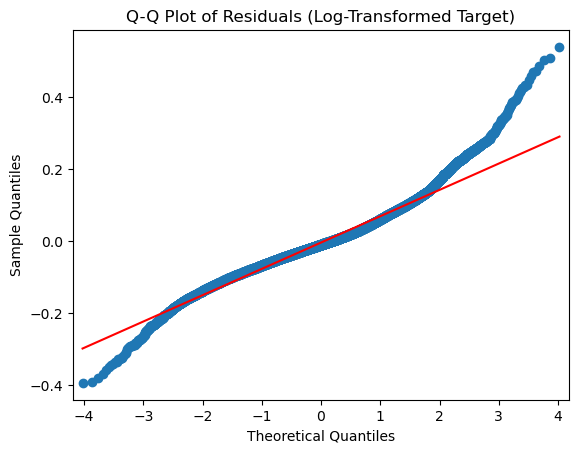

In [115]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals_transformed = y_test_transformed - y_pred_transformed

# Residuals vs Predicted values plot (on transformed scale)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_transformed, y=residuals_transformed)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Log-Transformed Time Taken")
plt.ylabel("Residuals (Log-Transformed)")
plt.title("Residuals vs Predicted Values (Log-Transformed Target)")
plt.show()

# Histogram of Residuals (on transformed scale)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_transformed, bins=50, kde=True)
plt.xlabel("Residuals (Log-Transformed)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Log-Transformed Target)")
plt.show()

# Q-Q plot of Residuals (on transformed scale)
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_transformed, line='s')
plt.title("Q-Q Plot of Residuals (Log-Transformed Target)")
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [117]:
# Compare the scaled vs unscaled features used in the final model
# Get the coefficients from the final model
coefficients = final_model.coef_

# Get the names of the selected features
selected_feature_names = preprocessor.get_feature_names_out()[selected_features_indices_final]

# Create a DataFrame to display coefficients
coef_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': coefficients})

print("Scaled Coefficients of the Final Model:")
display(coef_df.sort_values(by='Coefficient', ascending=False))


Scaled Coefficients of the Final Model:


Feature  Coefficient
3  num__total_outstanding_orders    17.449169
4                  num__distance     3.907883
0                  num__subtotal     2.612862
6                 num__isWeekend     0.807104
7               num__total_items     0.265548
5                num__order_hour    -2.112458
2        num__total_busy_dashers    -3.998536
1     num__total_onshift_dashers   -12.694230

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [119]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Get the scaled coefficient for 'total_items' from the final model
# Find the index of 'num__total_items' in the selected features
try:
    # Remove the extra .tolist() call
    total_items_index_in_selected = selected_feature_names_final.index('num__total_items')
    scaled_coef_total_items = final_model.coef_[total_items_index_in_selected]

    # Get the standard deviation of the original 'total_items' from the training data before scaling
    # We need to access the original X_train before scaling for this
    # Assuming the original X_train is still available or can be recreated
    # For now, let's assume we can access the original X_train or its stats from the preprocessor
    # A more robust approach would be to save the scaler's parameters
    # Let's try to get the standard deviation from the preprocessor if possible

    # Re-fit the preprocessor on the original X_train to get scaling parameters
    temp_preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])
    temp_preprocessor.fit(X_train) # Fit on original X_train

    # Find the index of 'total_items' in the numerical columns handled by the scaler
    numerical_features_after_preproc = temp_preprocessor.transformers_[0][1].get_feature_names_out(numerical_cols)
    total_items_numerical_index = np.where(numerical_features_after_preproc == 'total_items')[0][0]

    # Get the standard deviation from the fitted scaler
    std_dev_total_items = temp_preprocessor.transformers_[0][1].scale_[total_items_numerical_index]


    # The effect of a one-unit change in the original feature is the scaled coefficient divided by the standard deviation of the original feature
    effect_of_unit_change = scaled_coef_total_items / std_dev_total_items

    print(f"Scaled Coefficient for 'total_items': {scaled_coef_total_items:.4f}")
    print(f"Standard Deviation of original 'total_items': {std_dev_total_items:.4f}")
    print(f"Effect of a one-unit increase in original 'total_items' on predicted 'time_taken': {effect_of_unit_change:.4f} minutes")

except ValueError:
    print("'total_items' was not included in the final set of selected features.")
except NameError:
     print("Could not access necessary variables (e.g., preprocessor, X_train) to calculate the effect of a unit change.")


Scaled Coefficient for 'total_items': 0.2655
Standard Deviation of original 'total_items': 1.0000
Effect of a one-unit increase in original 'total_items' on predicted 'time_taken': 0.2655 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes, there are categorical variables in the dataset. These are
> 1) market_id
> 2) store_primary_category
> 3) order_protocol
> 

Certain markets, store categories, or order protocols might consistently have longer or shorter average delivery times, and the variability in delivery time might also differ across categories.





---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> Test size 0.2 refers to that 20% of the data will be treated as test set and remaining 80% of the data will be treated as Train set



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Looking at the heatmap - Distance has the highest correlation with the target variable



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect potential outliers, we used boxplots for the numerical features and the target variable (time_taken)
>To address these outliers in the training set, we used a method called capping. Specifically, we capped the values of the numerical features and the target variable at the 95th percentile. This means any value above the 95th percentile for a given feature or the target was replaced with the value at the 95th percentile. 



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>  Looking at the coefficients:
>  1) total_outstanding_orders (Coefficient: ~17.45) - This feature has the largest positive coefficient, indicating that a higher number of outstanding orders is strongly associated with increased delivery time.
>  2) total_onshift_dashers (Coefficient: ~-12.69) - This feature has the largest negative coefficient in magnitude, suggesting that more on-shift delivery partners are strongly associated with decreased delivery time.
>  3) total_busy_dashers (Coefficient: ~-4.00) - This feature has the third largest absolute coefficient, indicating that a higher number of busy dashers is associated with decreased delivery time, although the effect is less pronounced than total on-shift dashers.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>The primary goal of linear regression is to find a linear relationship between the input features and the target variable. It aims to model how changes in the input features affect the target variable.
>linear regression is a straightforward yet powerful algorithm that models linear relationships to make predictions by finding the line (or hyperplane) that minimizes the error between predicted and actual values.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>1) Simple Linear Regression is used when there is only one independent variable. It models the relationship between a single predictor and the response variable using a straight line.
>2) Multiple Linear Regression, on the other hand, is used when there are two or more independent variables. It models the relationship between several predictors and the response variable.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In linear regression, the cost function plays a critical role in measuring how well the model’s predicted values match the actual data. It quantifies the error between the predicted outputs and the true outputs.The most commonly used cost function in linear regression is the Mean Squared Error (MSE




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model learns not only the underlying patterns in the training data but also the noise and random fluctuations. As a result, it performs very well on the training data but poorly on unseen test data.
>Underfitting happens when a model is too simple to capture the underlying structure of the data. It fails to perform well on both the training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>